In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('autompg.csv', sep='\s+', header=None, na_values='?')

In [3]:
dataset.shape

(398, 9)

In [4]:
dataset.isna().sum()

0    0
1    0
2    0
3    6
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [5]:
dataset = dataset.dropna()
dataset.shape

(392, 9)

In [6]:
dataset.head()

0  1      2      3       4     5   6  7                          8
0  18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1  15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2  18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3  16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4  17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset[8] = le.fit_transform(dataset[8])
print(dataset.head())

      0  1      2      3       4     5   6  7    8
0  18.0  8  307.0  130.0  3504.0  12.0  70  1   48
1  15.0  8  350.0  165.0  3693.0  11.5  70  1   35
2  18.0  8  318.0  150.0  3436.0  11.0  70  1  229
3  16.0  8  304.0  150.0  3433.0  12.0  70  1   13
4  17.0  8  302.0  140.0  3449.0  10.5  70  1  159


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


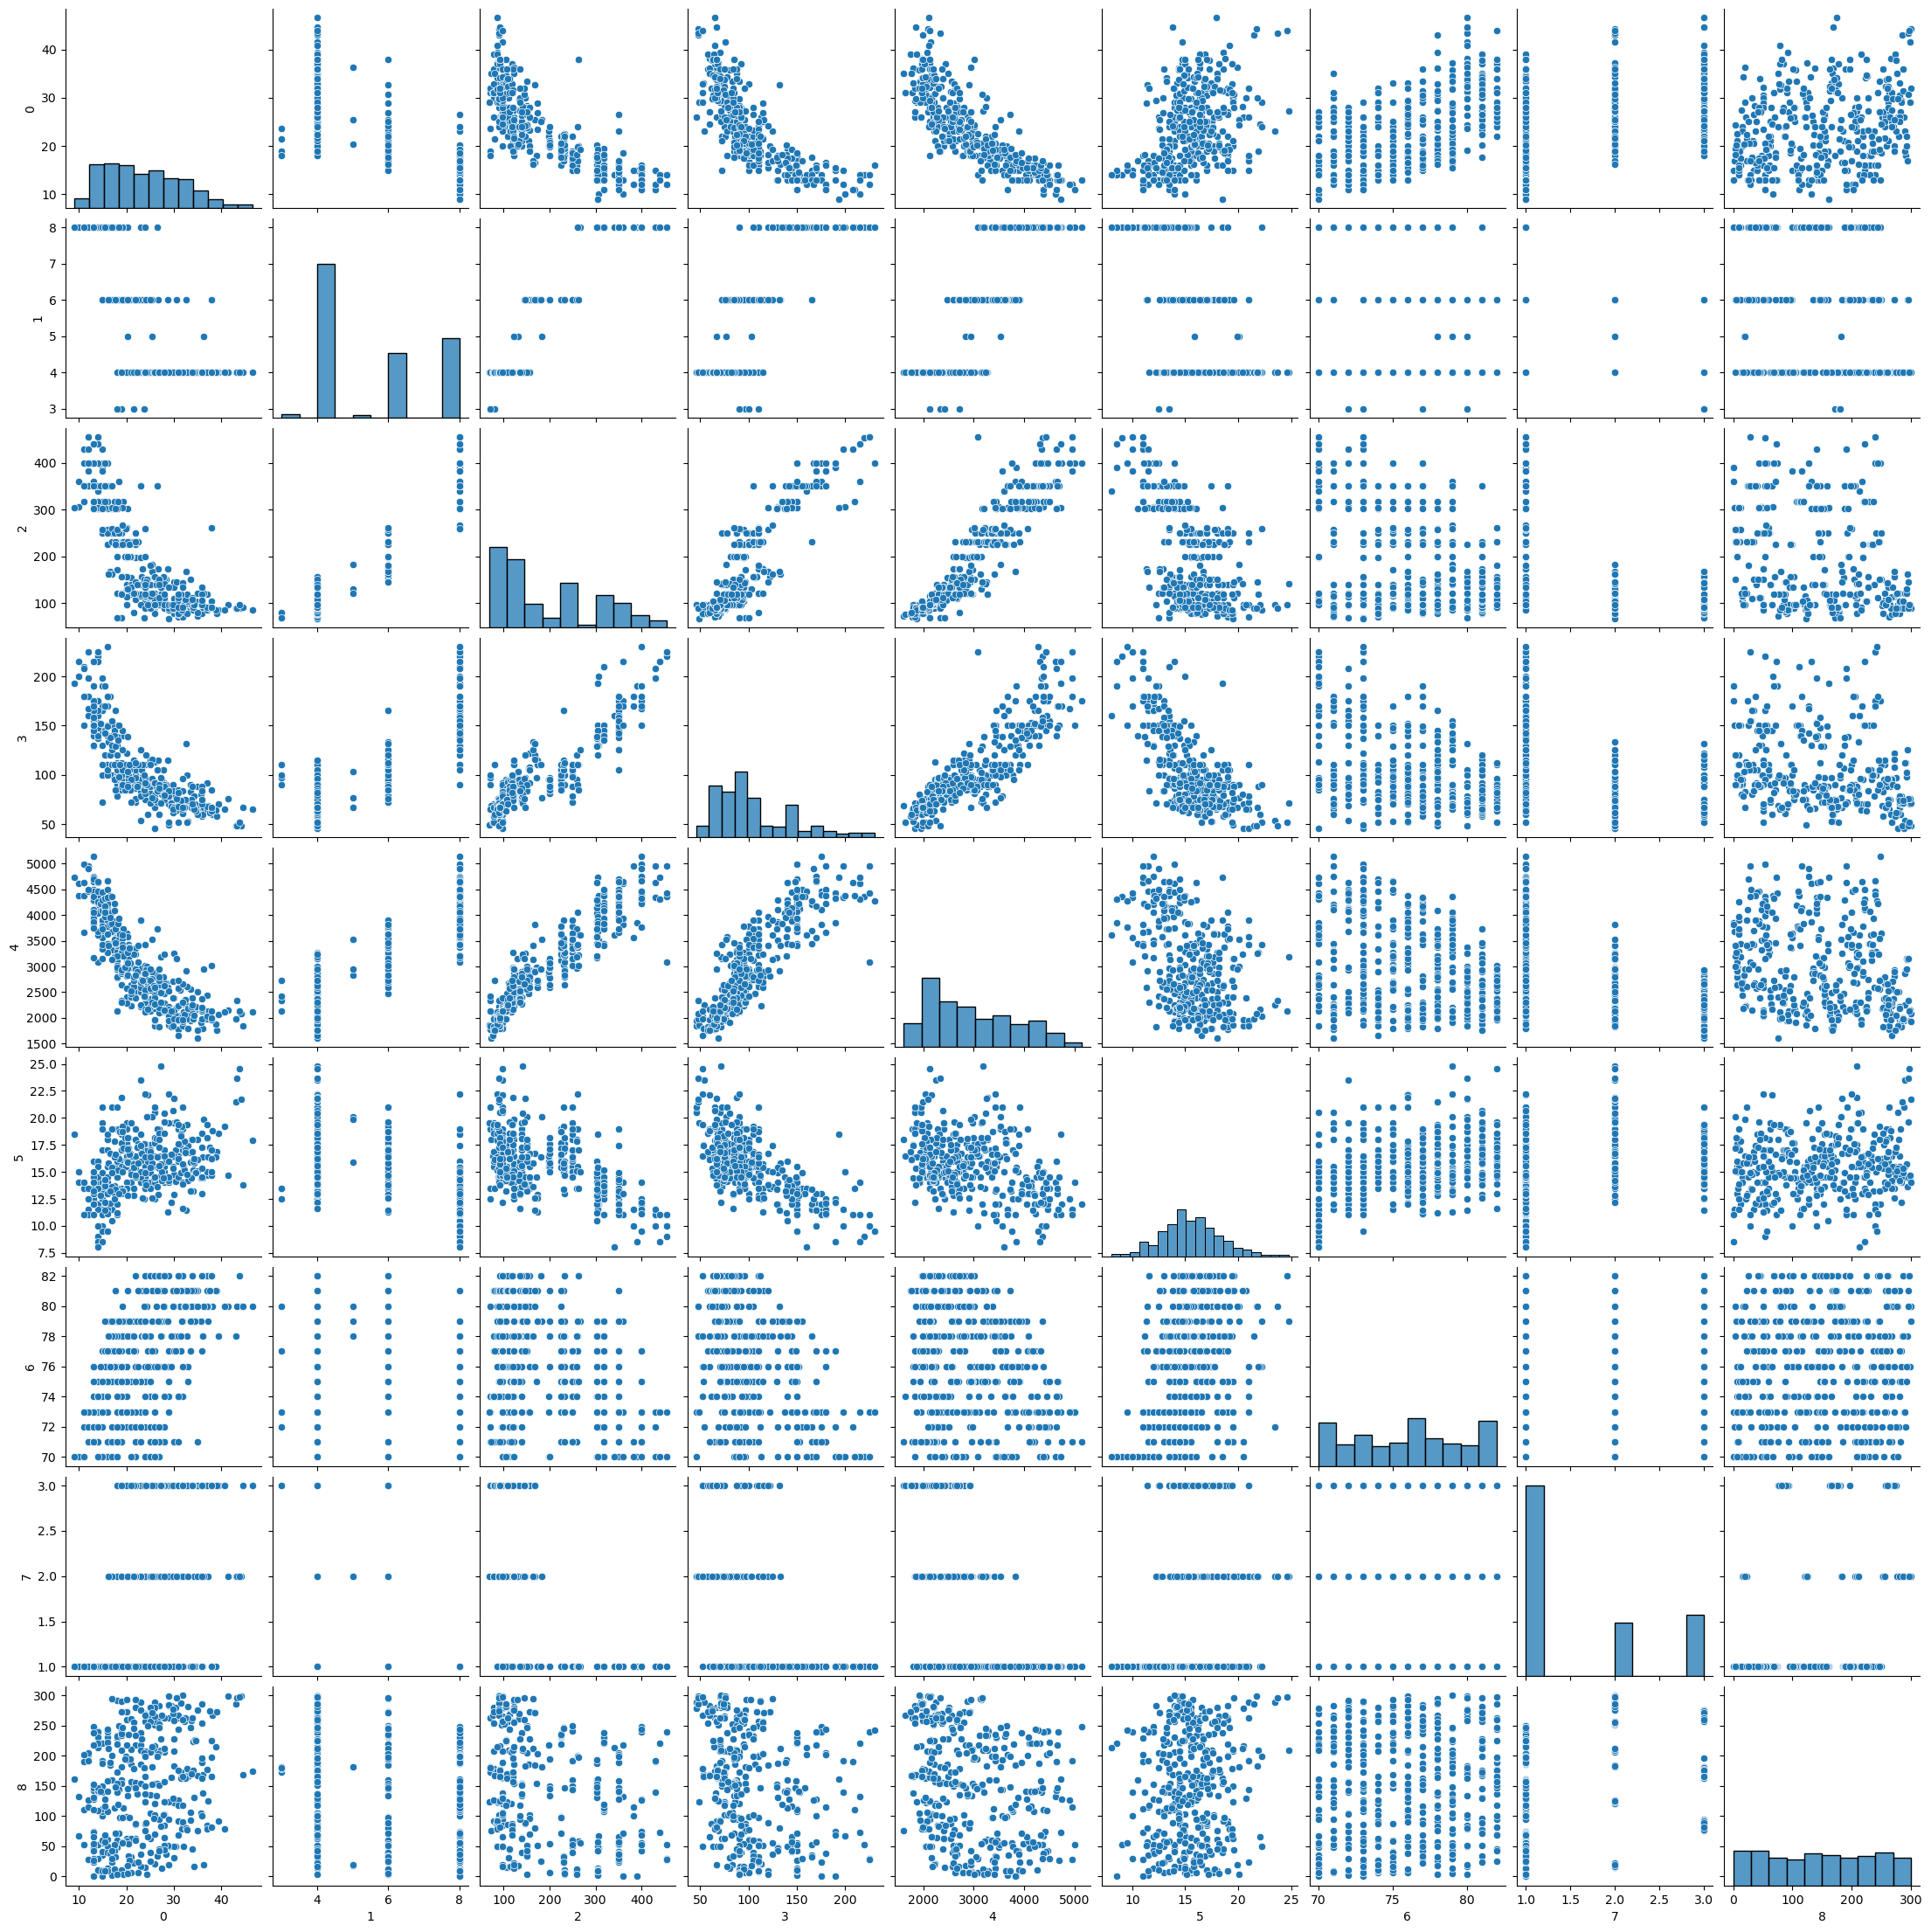

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(dataset)
plt.show()

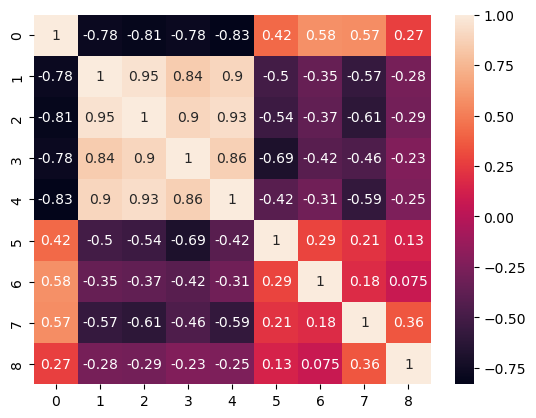

In [9]:
import numpy as np
corr = np.corrcoef(dataset.values.T)
hm = sns.heatmap(corr, annot=True)
plt.show()

In [10]:
dataset = dataset.drop(columns=[6,8])
print(dataset.shape)

(392, 7)


In [11]:
target = dataset[1]

In [12]:
features = dataset.drop(columns=[1])
print(features.head())

      0      2      3       4     5  7
0  18.0  307.0  130.0  3504.0  12.0  1
1  15.0  350.0  165.0  3693.0  11.5  1
2  18.0  318.0  150.0  3436.0  11.0  1
3  16.0  304.0  150.0  3433.0  12.0  1
4  17.0  302.0  140.0  3449.0  10.5  1


In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(features, target, test_size=0.15)

In [14]:
print(ytrain)

19     4
359    4
348    4
161    6
178    4
      ..
113    6
131    4
147    4
199    6
291    8
Name: 1, Length: 333, dtype: int64


In [15]:
print(xtrain.shape)
print(xtest.shape)

(333, 6)
(59, 6)


In [16]:
xtrain.describe()

0           2           3            4           5           7
count  333.000000  333.000000  333.000000   333.000000  333.000000  333.000000
mean    23.358258  198.046547  105.396396  2994.378378   15.441441    1.546547
std      7.912132  106.161044   39.208113   853.659702    2.776606    0.796318
min      9.000000   70.000000   46.000000  1613.000000    8.000000    1.000000
25%     17.000000  105.000000   75.000000  2234.000000   13.500000    1.000000
50%     22.000000  151.000000   95.000000  2815.000000   15.500000    1.000000
75%     29.000000  302.000000  130.000000  3630.000000   17.000000    2.000000
max     46.600000  455.000000  230.000000  5140.000000   24.800000    3.000000

In [17]:
ytrain.describe()

count    333.000000
mean       5.507508
std        1.706853
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: 1, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_std = sc.fit_transform(xtrain)
xtest_std = sc.transform(xtest)

In [19]:
pd.DataFrame(xtrain_std).describe()

0             1             2             3             4  \
count  3.330000e+02  3.330000e+02  3.330000e+02  3.330000e+02  3.330000e+02   
mean   1.920386e-16 -3.667403e-17 -3.133963e-17  5.534445e-17  2.040410e-16   
std    1.001505e+00  1.001505e+00  1.001505e+00  1.001505e+00  1.001505e+00   
min   -1.817445e+00 -1.207969e+00 -1.517180e+00 -1.620619e+00 -2.684082e+00   
25%   -8.048180e-01 -8.777850e-01 -7.764245e-01 -8.920682e-01 -7.002660e-01   
50%   -1.719261e-01 -4.438290e-01 -2.655584e-01 -2.104449e-01  2.112171e-02   
75%    7.141225e-01  9.806789e-01  6.284574e-01  7.457048e-01  5.621625e-01   
max    2.941902e+00  2.424054e+00  3.182788e+00  2.517221e+00  3.375575e+00   

                  5  
count  3.330000e+02  
mean   8.268328e-17  
std    1.001505e+00  
min   -6.873751e-01  
25%   -6.873751e-01  
50%   -6.873751e-01  
75%    5.702947e-01  
max    1.827965e+00

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(xtrain_std, ytrain)

LinearRegression()

In [22]:
lr_train_result = lr.predict(xtrain_std)
lr_test_result = lr.predict(xtest_std)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
print("Training Result")
print("MSE:", mean_squared_error(ytrain, lr_train_result))
print("R2_score:", r2_score(ytrain, lr_train_result))

Training Result
MSE: 0.2621357884768093
R2_score: 0.9097514485221277


In [25]:
print("Testing Result")
print("MSE:", mean_squared_error(ytest, lr_test_result))
print("R2_score:", r2_score(ytest, lr_test_result))

Testing Result
MSE: 0.3151936960904118
R2_score: 0.8890831726556082
